In [0]:
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

# Data Import

In [0]:
data_list = pd.read_csv('/content/Data_Entry_2017.csv')

In [0]:
data_list.head()

In [0]:
data_list = data_list.iloc[:, [0,1]]

In [0]:
data_list.describe()

,Image Index,Finding Labels
count,86531,86531
unique,86531,9
top,00025063_000.png,No Finding
freq,1,60361


# EDA

In [0]:
counts = data_list.groupby(['Finding Labels']).agg({'Image Index':'count'})
counts.sort_values('Image Index', ascending=False, inplace=True)

In [0]:
counts = data_list['Finding Labels'].value_counts()[:10]
counts.sort_values(ascending=True, inplace=True)
counts

Consolidation                1310
Atelectasis|Infiltration     1350
Effusion|Infiltration        1603
Mass                         2139
Pneumothorax                 2194
Nodule                       2705
Effusion                     3955
Atelectasis                  4215
Infiltration                 9547
No Finding                  60361
Name: Finding Labels, dtype: int64

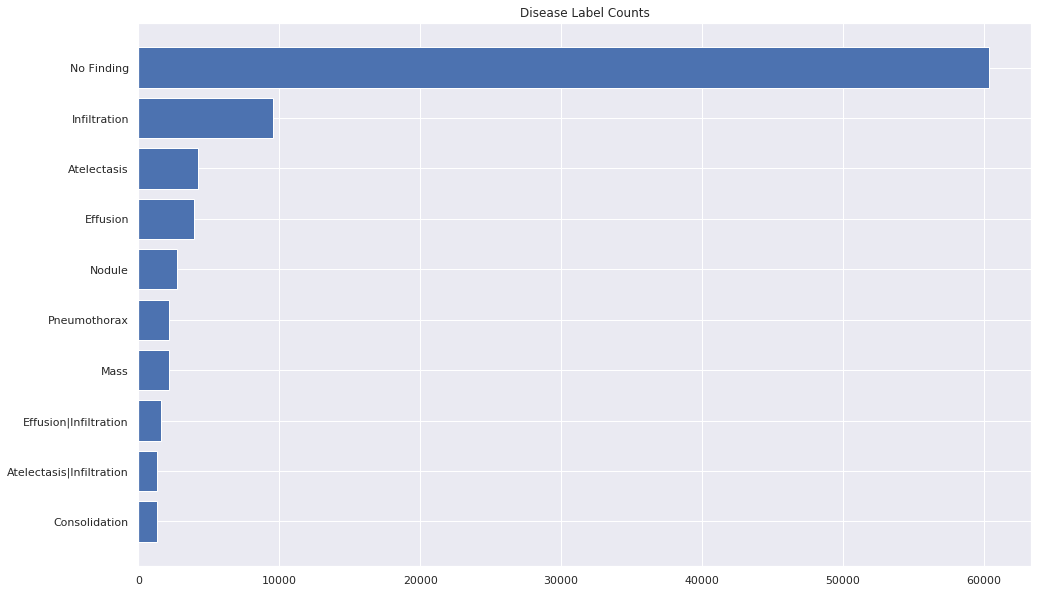

In [0]:
plt.figure(figsize=(16,10))
plt.barh(y=counts.index, width=counts.values)
plt.title('Disease Label Counts')
plt.show()

# Data Segregation

In [0]:
disease_list = data_list[data_list['Finding Labels'] != 'No Finding']
Nodisease_list = data_list[data_list['Finding Labels'] == 'No Finding'].sample(2000, random_state=0)

In [0]:
data_list = pd.concat([disease_list, Nodisease_list], axis=0)
data_list.sort_index(inplace=True)

In [0]:
len(data_list)

28170

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_list['Image Index'], data_list['Finding Labels'], 
                                                    test_size=0.05, random_state=0, stratify=data_list['Finding Labels'])

In [0]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

**Segregating Data**

In [0]:
original_dataset_dir = '/home/rajat/Documents/Aegis/CAPSTONE/Data - CXR8/Data/images'

base_dir = '/home/rajat/Documents/Aegis/CAPSTONE/Data - CXR8/Data/images_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [0]:
for i in counts.index:
    os.mkdir(os.path.join(train_dir, i))
    for fname in data_train[data_train['Finding Labels'] == i]['Image Index']:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dir+'/'+i, fname)
        shutil.copyfile(src, dst)

In [0]:
for i in counts.index:
    os.mkdir(os.path.join(validation_dir, i))
    for fname in data_test[data_test['Finding Labels'] == i]['Image Index']:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dir+'/'+i, fname)
        shutil.copyfile(src, dst)

# Loading Data in Colab

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from zipfile import ZipFile

file_name1 = '/content/gdrive/My Drive/Dataset/images_small.zip'

with ZipFile(file_name1, 'r') as zip: 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


In [0]:
# Download the 56 zip files in Images_png in batches
import urllib.request, urllib.parse, urllib.error

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading', fn, '...')
    urllib.request.urlretrieve(link, fn)  # download the zip file
print("Download complete.")

downloading images_01.tar.gz ...
downloading images_02.tar.gz ...
downloading images_03.tar.gz ...
downloading images_04.tar.gz ...
downloading images_05.tar.gz ...
downloading images_06.tar.gz ...
downloading images_07.tar.gz ...
downloading images_08.tar.gz ...
downloading images_09.tar.gz ...


In [0]:
import tarfile

nums = ['01','02','03','04','05','06','07','08','09','10','11','12']
file_names = ['images_{}.tar.gz'.format(x) for x in nums]

for idx, file in enumerate(file_names):
    with tarfile.open(file, 'r:gz') as tar: 
        print(idx,': Extracting all the files now...') 
        tar.extractall() 
        print(idx,': Done!') 

**Trying with Kaggle API**

In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saideeprajat","key":"ea6c85fdf3acec14c69a3d079a3bb30e"}'}

In [2]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d nih-chest-xrays/data

100% 42.0G/42.0G [05:20<00:00, 156MB/s]
100% 42.0G/42.0G [05:20<00:00, 141MB/s]


In [3]:
from zipfile import ZipFile

file_name = '/content/data.zip'

with ZipFile(file_name, 'r') as zip: 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


In [4]:
nums = ['01','02','03','04','05','06','07','08','09','10','11','12']
file_names = ['images_0{}.zip'.format(x) for x in nums]

for idx, file in enumerate(file_names):
    with ZipFile(file, 'r') as zip: 
        print(idx,': Extracting all the files now...') 
        zip.extractall() 
        print(idx,': Done!') 

0 : Extracting all the files now...
0 : Done!
1 : Extracting all the files now...
1 : Done!
2 : Extracting all the files now...
2 : Done!
3 : Extracting all the files now...
3 : Done!
4 : Extracting all the files now...
4 : Done!
5 : Extracting all the files now...
5 : Done!
6 : Extracting all the files now...
6 : Done!
7 : Extracting all the files now...
7 : Done!
8 : Extracting all the files now...
8 : Done!
9 : Extracting all the files now...
9 : Done!
10 : Extracting all the files now...
10 : Done!
11 : Extracting all the files now...
11 : Done!


# Data Preprocessing

In [0]:
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [0]:
file = open('/content/train_val_list.txt')

ims = []

for f in file:
    ims.append(f.strip('\n'))
    
file.close()

In [0]:
data = pd.read_csv('/content/Data_Entry_2017.csv')
data = data.loc[:,['Image Index','Finding Labels']]

In [0]:
data = data[data['Image Index'].isin(ims)]

In [0]:
data['Finding Labels2'] = data['Finding Labels'].apply(lambda x: x.split('|'))

In [0]:
labels = []

for i in data['Finding Labels2']:
    labels += i
    
labels = list(np.unique(labels))

In [0]:
for i in labels:
    data[i] = data['Finding Labels2'].map(lambda x: 1. if i in x else 0.)

In [0]:
data.drop('No Finding', inplace=True, axis=1)

In [0]:
dis_dict = {}
for i in data.columns[3:]:
    dis_dict[i] = data[i].value_counts()[1]

In [24]:
dis_dict

{'Atelectasis': 8280,
 'Cardiomegaly': 1707,
 'Consolidation': 2852,
 'Edema': 1378,
 'Effusion': 8659,
 'Emphysema': 1423,
 'Fibrosis': 1251,
 'Hernia': 141,
 'Infiltration': 13782,
 'Mass': 4034,
 'Nodule': 4708,
 'Pleural_Thickening': 2242,
 'Pneumonia': 876,
 'Pneumothorax': 2637}

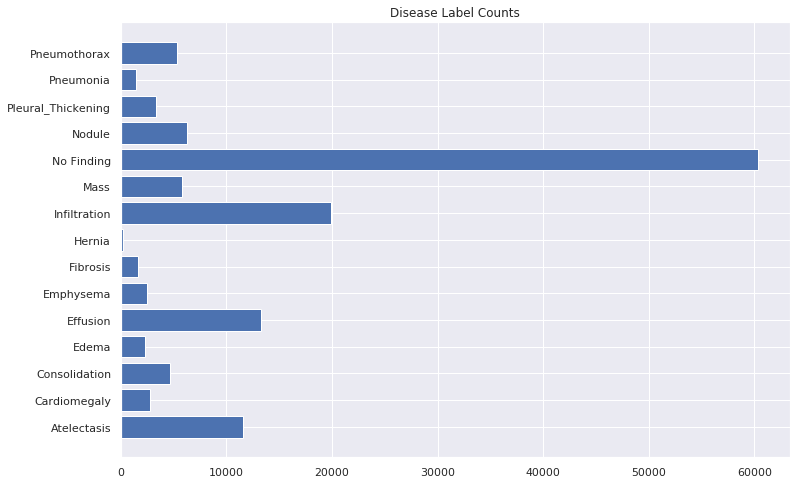

In [0]:
plt.figure(figsize=(12,8))
plt.barh(y=list(dis_dict.keys()), 
         width=list(dis_dict.values()))
plt.title('Disease Label Counts')
plt.show()

In [0]:
def get_class_weights(total_counts, class_positive_counts):
    
    def get_single_class_weight(pos_counts, total_counts):
        denominator = (total_counts - pos_counts) + pos_counts
        return (denominator - pos_counts) / denominator

    class_names = list(class_positive_counts.keys())
    label_counts = np.array(list(class_positive_counts.values()))
    class_weights = {}
    
    for i, class_name in enumerate(class_names):
        class_weights[i] = get_single_class_weight(label_counts[i], total_counts)

    return class_weights

In [0]:
weights = get_class_weights(len(data), dis_dict)

In [0]:
count_weights = pd.DataFrame({'disease' : list(dis_dict.keys()),
                             'weights' : [1 - len(data[data[x] == 1])/len(data) for x in list(dis_dict.keys())]})

In [0]:
# n_weights = {}
# cnt = 0
# for i in count_weights.disease:
#     n_weights[cnt] = count_weights['weights'][count_weights['disease'] == i].values[0]
#     cnt += 1

In [0]:
notreqlabels = ['Consolidation','Edema','Emphysema',
                'Fibrosis','Hernia','Pleural_Thickening']
data = data[(data['Consolidation']==0) & (data['Edema']==0) & 
            (data['Emphysema']==0) & (data['Fibrosis']==0) & 
            (data['Hernia']==0) & (data['Pleural_Thickening']==0)]
data.drop(notreqlabels, inplace=True, axis=1)

In [0]:
def calculating_class_weights(df, true_cols):
    from sklearn.utils.class_weight import compute_class_weight
    number_dim = np.shape(df[true_cols])[1]
    weights = np.empty([number_dim, 2])
    cnt=0
    for i in true_cols:
        weights[cnt] = compute_class_weight('balanced', [0.,1.], df.loc[:, i].values)
        cnt+=1
    return weights

In [0]:
weights = calculating_class_weights(data, list(dis_dict.keys()))

In [0]:
weights

array([[  0.55291141,   5.22487923],
       [  0.51006284,  25.34387815],
       [  0.51704274,  15.16900421],
       [  0.50809198,  31.39477504],
       [  0.55560265,   4.99618894],
       [  0.50836065,  30.40196767],
       [  0.50733526,  34.58193445],
       [  0.50081613, 306.82269504],
       [  0.59473207,   3.13902191],
       [  0.52445145,  10.72434308],
       [  0.52877188,   9.18903993],
       [  0.51330059,  19.29616414],
       [  0.50511395,  49.38584475],
       [  0.51571757,  16.40576413]])

In [0]:
# count_weights = pd.DataFrame({'disease' : list(dis_dict.keys()),
#                              'weights' : weights[:,1]})
count_weights = pd.DataFrame({'disease' : list(dis_dict.keys()),
                             'weights' : [1 - len(data[data[x] == 1])/len(data) for x in list(dis_dict.keys())]})

In [0]:
n_weights = {}

for idx, i in enumerate(count_weights.disease):
    n_weights[idx] = count_weights['weights'][count_weights['disease'] == i].values[0]

In [0]:
sample_weights = data['Finding Labels2'].map(lambda x: sum([count_weights.weights[count_weights.disease == disease].values for disease in x])).values
sample_weights /= sample_weights.sum()
sample_weights = [i[0] for i in sample_weights]

In [0]:
n_weights

{0: 5.22487922705314,
 1: 25.343878148799064,
 2: 15.169004207573632,
 3: 31.39477503628447,
 4: 4.996188936366786,
 5: 30.401967673928322,
 6: 34.58193445243805,
 7: 306.822695035461,
 8: 3.139021912639675,
 9: 10.724343083787804,
 10: 9.189039932030587,
 11: 19.296164139161462,
 12: 49.385844748858446,
 13: 16.405764125900646}

In [0]:
data['weights'] = sample_weights

In [0]:
dis_dict = {}
for i in data.columns[3:-1]:
    dis_dict[i] = data[i].value_counts()[1]
dis_dict

{'Atelectasis': 9187,
 'Cardiomegaly': 2314,
 'Effusion': 10306,
 'Infiltration': 16421,
 'Mass': 4414,
 'Nodule': 5193,
 'Pneumonia': 927,
 'Pneumothorax': 4049}

In [0]:
data2 = data.sample(50000, weights=data.weights.values)
data2.drop('weights', axis=1, inplace=True)
data.drop('weights', axis=1, inplace=True)

In [0]:
len(data)

40000

In [0]:
dis_dict = {}
for i in data2.columns[3:]:
    dis_dict[i] = data2[i].value_counts()[1]

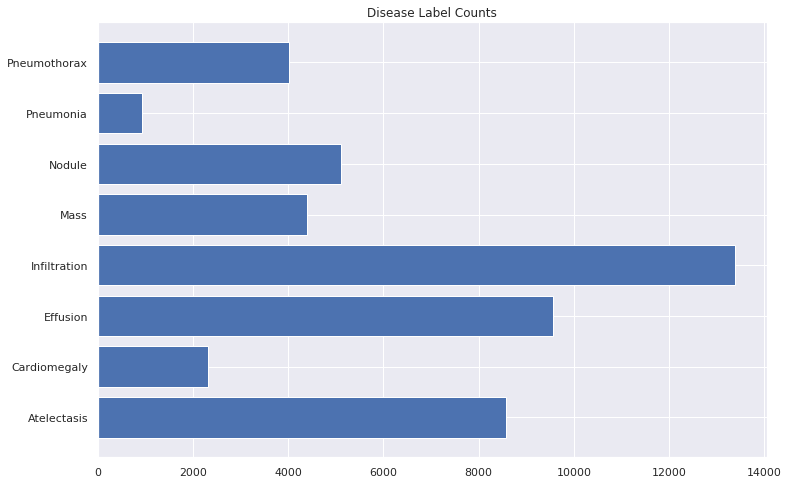

In [0]:
plt.figure(figsize=(12,8))
plt.barh(y=list(dis_dict.keys()), 
         width=list(dis_dict.values()))
plt.title('Disease Label Counts')
plt.show()

In [0]:
dis_dict

{'Atelectasis': 8576,
 'Cardiomegaly': 2314,
 'Effusion': 9553,
 'Infiltration': 13390,
 'Mass': 4387,
 'Nodule': 5114,
 'Pneumonia': 927,
 'Pneumothorax': 4023}

In [0]:
dis_dict

In [0]:
# len(data[data.Pneumonia == 1])
disease_list = data[data['Pneumonia'] == 1].copy()
data2 = data2[data2['Pneumonia'] == 0]
data2 = pd.concat([disease_list,data2], axis=0, sort=False)

In [0]:
data2 = data.copy()

In [0]:
data2.head()

,Image Index,Finding Labels,Finding Labels2,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,[Cardiomegaly],0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,"[Cardiomegaly, Emphysema]",0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,"[Cardiomegaly, Effusion]",0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,[No Finding],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,00000004_000.png,Mass|Nodule,"[Mass, Nodule]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [0]:
# df_train.to_csv(path_or_buf='/content/df_train.csv', sep=',', index=False)
# df_val.to_csv(path_or_buf='/content/df_val.csv', sep=',', index=False)

In [0]:
df_dir = '/content/'
img_dir = '/content/images/'

In [0]:
# df_train = pd.read_csv(df_dir + 'df_train.csv')
# df_val = pd.read_csv(df_dir + 'df_val.csv')

In [0]:
# cats_list = list(df_train.iloc[:,3:].columns)
cats_list = list(data2.iloc[:,3:].columns)

In [0]:
# df_train['path'] = [img_dir+x for x in df_train['Image Index']]
# df_val['path'] = [img_dir+x for x in df_val['Image Index']]
data2['path'] = [img_dir+x for x in data2['Image Index']]

In [0]:
def calculating_class_weights(df, true_cols):
    from sklearn.utils.class_weight import compute_class_weight
    number_dim = np.shape(df[true_cols])[1]
    weights = np.empty([number_dim, 2])
    cnt=0
    for i in true_cols:
        weights[cnt] = compute_class_weight('balanced', [0.,1.], df.loc[:, i].values)
        cnt+=1
    return weights

In [0]:
weights = calculating_class_weights(data2, cats_list)

In [0]:
data2.head()

In [0]:
df_train, df_val = train_test_split(data2, test_size = 0.1, random_state = 0)

In [0]:
dis_dict = {}
for i in df_val.columns[3:]:
    dis_dict[i] = df_val[i].value_counts()[1]
    
dis_dict

{'Atelectasis': 614,
 'Cardiomegaly': 131,
 'Consolidation': 220,
 'Edema': 115,
 'Effusion': 667,
 'Emphysema': 120,
 'Fibrosis': 103,
 'Hernia': 6,
 'Infiltration': 1124,
 'Mass': 349,
 'Nodule': 403,
 'Pleural_Thickening': 209,
 'Pneumonia': 68,
 'Pneumothorax': 200,
 'path': 1}

In [39]:
len(df_val)

8653

In [38]:
from keras.preprocessing import image
from keras import models
from keras import layers
from keras import optimizers
from keras import backend as K

Using TensorFlow backend.


In [0]:
height = 224
width = 224

In [0]:
df_train.head()

In [0]:
# df_train['disease_vec'] = df_train.apply(lambda x: [x[cats_list].values], 1).map(lambda x: x[0])
# df_val['disease_vec'] = df_val.apply(lambda x: [x[cats_list].values], 1).map(lambda x: x[0])

In [0]:
img_gen = image.ImageDataGenerator(#rescale=1./255.,
                                   horizontal_flip=True,
                                   vertical_flip=False,
#                                    height_shift_range= 0.05,
#                                    width_shift_range=0.1,
#                                    rotation_range=5,
#                                    shear_range=0.1,
#                                    fill_mode='reflect',
#                                    zoom_range=0.15
                                  )
# img_gen = image.ImageDataGenerator(rescale=1./255)

In [42]:
train_gen = img_gen.flow_from_dataframe(dataframe=df_train, 
                                        directory=None, 
                                        x_col='path',
                                        y_col=cats_list,
                                        target_size=(height,width),
                                        color_mode='rgb',
                                        class_mode='other',
                                        #classes=cats_list,
                                        batch_size=32, seed=0)

val_gen = img_gen.flow_from_dataframe(dataframe=df_val, 
                                        directory=None, 
                                        x_col='path',
                                        y_col=cats_list,
                                        target_size=(height,width),
                                        color_mode='rgb',
                                        class_mode='other',
                                        #classes=cats_list,
                                        batch_size=2048, seed=0)

Found 77871 images.
Found 8653 images.


In [0]:
test_x, test_y = next(val_gen)

In [0]:
test_y

# Model Building for Multi-Label Classification

In [0]:
from keras.applications import DenseNet121

conv_base = DenseNet121(weights='imagenet',
                  include_top=False,
                  input_shape=(height, width, 3))

In [0]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="xray_best_weights.hdf5"

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early_stop = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=20)

In [0]:
conv_base.summary()

In [0]:
# model = models.Sequential()
# model.add(conv_base)
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(9, activation='sigmoid'))

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))
# model.add(layers.Dense(128))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(14, activation='sigmoid'))

In [0]:
model.summary()

In [0]:
def get_weighted_loss(weights):
    def weighted_loss(y_true, y_pred):
        from keras import backend as K
        return K.mean((weights[:,0]**(1-y_true))*(weights[:,1]**(y_true))*K.binary_crossentropy(y_true, y_pred), axis=-1)
    return weighted_loss

In [0]:
def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [0]:
def jaccard_distance_loss(y_true, y_pred, smooth=100):
    """
    Jaccard = (|X & Y|)/ (|X|+ |Y| - |X & Y|)
            = sum(|A*B|)/(sum(|A|)+sum(|B|)-sum(|A*B|))
    
    The jaccard distance loss is usefull for unbalanced datasets. This has been
    shifted so it converges on 0 and is smoothed to avoid exploding or disapearing
    gradient.
    
    Ref: https://en.wikipedia.org/wiki/Jaccard_index
    
    @url: https://gist.github.com/wassname/f1452b748efcbeb4cb9b1d059dce6f96
    @author: wassname
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac) * smooth

In [0]:
model.compile(optimizer=optimizers.Adam(lr=0.001, decay=1e-8),
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])

In [63]:
history = model.fit_generator(train_gen, 
                              steps_per_epoch=100, 
                              validation_data=(test_x, test_y),
                              epochs=100,
                              callbacks=[checkpoint],
                              class_weight=weights)

Epoch 1/100
100/100 [==============================] - 87s 875ms/step - loss: 0.1411 - binary_accuracy: 0.9555 - val_loss: 0.1676 - val_binary_accuracy: 0.9532

Epoch 00001: val_loss did not improve from 0.16053
Epoch 2/100
100/100 [==============================] - 81s 805ms/step - loss: 0.1331 - binary_accuracy: 0.9578 - val_loss: 0.1714 - val_binary_accuracy: 0.9533

Epoch 00002: val_loss did not improve from 0.16053
Epoch 3/100
100/100 [==============================] - 80s 799ms/step - loss: 0.1427 - binary_accuracy: 0.9542 - val_loss: 0.1729 - val_binary_accuracy: 0.9531

Epoch 00003: val_loss did not improve from 0.16053
Epoch 4/100
100/100 [==============================] - 80s 804ms/step - loss: 0.1480 - binary_accuracy: 0.9528 - val_loss: 0.1813 - val_binary_accuracy: 0.9525

Epoch 00004: val_loss did not improve from 0.16053
Epoch 5/100
100/100 [==============================] - 82s 821ms/step - loss: 0.1342 - binary_accuracy: 0.9580 - val_loss: 0.1855 - val_binary_accuracy:

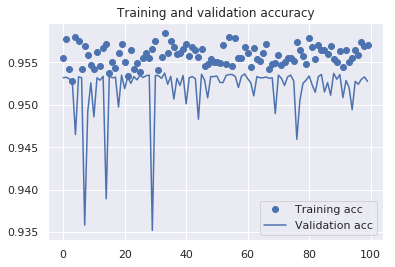

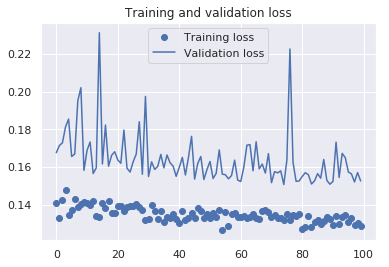

In [64]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model Performance Validation

In [0]:
model.load_weights(weight_path)

In [65]:
pred_y = model.predict(test_x, batch_size=32, verbose=True)

2048/2048 [==============================] - 9s 4ms/step


In [0]:
pred_y

Text(0, 0.5, 'True Positive Rate')

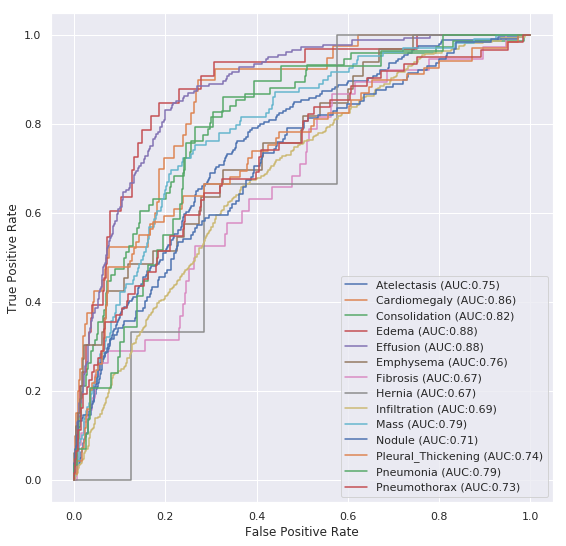

In [66]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(cats_list):
    fpr, tpr, thresholds = roc_curve(test_y[:,idx].astype(int), pred_y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

**Saving model and weights**

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

    # serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [0]:
model_file = drive.CreateFile({'title' : 'model.h5'})                       
model_file.SetContentFile('model.h5')                       
model_file.Upload()
# download to google drive                       
drive.CreateFile({'id': model_file.get('id')})

model_file = drive.CreateFile({'title' : 'model.json'})                       
model_file.SetContentFile('model.json')                       
model_file.Upload()
# download to google drive                       
drive.CreateFile({'id': model_file.get('id')})

**Loading saved model and weights if needed**

In [0]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

# Code for getting masks from bounding boxes

In [0]:
FILE_NAME = '/home/shivambhardwaj/Downloads/00000071_001.png'
img = cv2.imread(FILE_NAME) 
mask = np.zeros(img.shape,dtype = "uint8")
new=cv2.rectangle(mask, (339, 119), ((172+339), (351+119)), (255, 255, 255), -1) 
maskedImg = cv2.bitwise_and(img,mask)
#cv2.imshow(" masked image",maskedImg)
cv2.imwrite('/home/shivambhardwaj/Downloads/00000071_0012.png',maskedImg)

# Test

In [0]:
data = pd.read_csv('/content/Data_Entry_2017.csv')
data = data.loc[:,['Image Index','Finding Labels']]

In [0]:
data['Finding Labels2'] = data['Finding Labels'].apply(lambda x: x.split('|'))

In [0]:
labels = []

for i in data['Finding Labels2']:
    labels += i

In [0]:
labels = list(np.unique(labels))

In [0]:
for i in labels:
    data[i] = data['Finding Labels2'].map(lambda x: 1 if i in x else 0)

In [0]:
data.head()

,Image Index,Finding Labels,Finding Labels2,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,[Cardiomegaly],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,"[Cardiomegaly, Emphysema]",0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,"[Cardiomegaly, Effusion]",0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,[No Finding],0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,[Hernia],0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
n_labels = list(df_train['Finding Labels'].unique())
n_labels.sort()

In [0]:
notreqlabels = [x for x in labels if x not in n_labels]
notreqlabels

['Consolidation',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Pleural_Thickening']

In [0]:
notreqlabels = ['Consolidation','Edema','Emphysema',
                'Fibrosis','Hernia','Pleural_Thickening']
data = data[(data['Consolidation']==0) & (data['Edema']==0) & 
            (data['Emphysema']==0) & (data['Fibrosis']==0) & 
            (data['Hernia']==0) & (data['Pleural_Thickening']==0)]
data.drop(notreqlabels, inplace=True, axis=1)

In [0]:
data.head()

,Image Index,Finding Labels,Finding Labels2,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,No Finding,Nodule,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,[Cardiomegaly],0,1,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,"[Cardiomegaly, Effusion]",0,1,1,0,0,0,0,0,0
3,00000002_000.png,No Finding,[No Finding],0,0,0,0,0,1,0,0,0
12,00000004_000.png,Mass|Nodule,"[Mass, Nodule]",0,0,0,0,1,0,1,0,0
13,00000005_000.png,No Finding,[No Finding],0,0,0,0,0,1,0,0,0


In [0]:
for i in data.columns[3:]:
    print(i, ':', data[i].value_counts()[1])

Atelectasis : 9187
Cardiomegaly : 2314
Effusion : 10306
Infiltration : 16421
Mass : 4414
No Finding : 60361
Nodule : 5193
Pneumonia : 927
Pneumothorax : 4049


In [0]:
sample_weights = data['Finding Labels2'].map(lambda x: len(x) if len(x)>0 else 0).values + .1

In [0]:
# sample_weights

array([1.1, 2.1, 1.1, ..., 1.1, 1.1, 1.1])

In [0]:
sample_weights /= sample_weights.sum()

In [0]:
# sample_weights

array([8.94235514e-06, 1.70717689e-05, 8.94235514e-06, ...,
       8.94235514e-06, 8.94235514e-06, 8.94235514e-06])

In [0]:
data3 = data2.sample(40000, weights=sample_weights)

In [0]:
for i in n_labels:
    print(i, ':', data[i].value_counts()[1])

In [0]:
Nodisease_list = data[(data['Cardiomegaly']==1) | (data['Mass']==1) | (data['Nodule']==1) | (data['Pneumonia']==1) | (data['Pneumothorax']==1)]
for i in n_labels:
    print(Nodisease_list[i].value_counts())

In [0]:
disease_list = data[data['No Finding'] == 1].sample(5000, random_state=0)

In [0]:
data_final = pd.concat([disease_list, Nodisease_list], axis=0)
data_final.sort_index(inplace=True)

In [0]:
for i in n_labels:
    print(data_final[i].value_counts())

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_final['Image Index'], data_final.iloc[:,3:], 
                                                    test_size=0.05, random_state=0, stratify=data_final.iloc[:,3:])

In [0]:
data_final.iloc[:,3:].head()

,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,No Finding,Nodule,Pneumonia,Pneumothorax
0,0,1,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0
12,0,0,0,0,1,0,1,0,0
23,0,1,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0
